In [4]:
!pip install nltk
import pandas as pd
import numpy as np
import nltk
import re
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

stemmer = nltk.SnowballStemmer("english")




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
def clean(text):
    # Convert to lowercase
    text = str(text).lower()

    # Remove unwanted content
    text = re.sub('\[.*?\]','',text)  # Remove square brackets content
    text = re.sub('https?://\S+|www\.\S+','',text)  # Remove URLs
    text = re.sub('<.*?>+','',text)  # Remove HTML tags
    text = re.sub('[%s]' % re.escape(string.punctuation),'', text)  # Remove punctuation
    text = re.sub('\n','',text)  # Remove newline characters

    words = text.split()
    words = [word for word in words if word not in nltk.corpus.stopwords.words('english')]  # Remove stopwords

    # Perform stemming
    words = [stemmer.stem(word) for word in words]

    # Join words back to text
    text = " ".join(words)

    # Handle cases where text becomes empty
    if not text.strip():
        text = "emptytweet"  # Placeholder for empty tweets

    return text


In [11]:
data = pd.read_csv('train2.csv')  # Replace with your actual file path

# Apply the cleaning function to the 'tweet' column
data['tweet'] = data['tweet'].apply(clean)

# Check for empty tweets
empty_tweets = data[data['tweet'] == "emptytweet"]
print(f"Number of empty tweets: {len(empty_tweets)}")

data["labels"]= data["class"].map({0: "Hate Speech", 1:"Offensive Language", 2:"Normal"})
import pandas as pd

# Check the first few rows of the dataset to ensure it's loaded correctly
print("Dataset Overview:")


# Print each text along with its corresponding label
print("\nText and Corresponding Labels:")
for index, row in data.iterrows():
    print(f"Tweet: {row['tweet']}")
    print(f"Labels: {row['labels']}")
    print("-" * 50)


# Ensure 'labels' column exists
if 'labels' not in data.columns:
    raise ValueError("The 'labels' column is missing in the dataset.")

Streaming output truncated to the last 5000 lines.
Labels: Offensive Language
--------------------------------------------------
Tweet: yea buddi rt yalljustdontkno lot nba trash talk go
Labels: Normal
--------------------------------------------------
Tweet: yea randi white 745 chang whole mind hoe nice
Labels: Offensive Language
--------------------------------------------------
Tweet: yea bad hoe
Labels: Offensive Language
--------------------------------------------------
Tweet: yea bad hoe
Labels: Offensive Language
--------------------------------------------------
Tweet: yea mike bitchass refere tokyo royceda59
Labels: Offensive Language
--------------------------------------------------
Tweet: yea bitch crazi
Labels: Offensive Language
--------------------------------------------------
Tweet: yeaaa bitch dog like shaggi yea stay clean get dirti like harri
Labels: Offensive Language
--------------------------------------------------
Tweet: yeah chris brown definit realest waffl 

In [2]:
# Ensure no empty labels exist
data = data[data['labels'].notnull()]

# Prepare features and labels
x = np.array(data["tweet"])
y = np.array(data["labels"])

# Apply CountVectorizer to convert text into numeric features
cv = CountVectorizer()
X = cv.fit_transform(x)


NameError: name 'data' is not defined

In [ ]:
vocabulary_size = len(cv.get_feature_names_out())
print(f"Vocabulary size: {vocabulary_size}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.2, random_state=42)

# Then, split the remaining 20% into 10% validation and 10% test
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

# Print the shapes
print(f"Training Features Shape: {X_train.shape}")
print(f"Validation Features Shape: {X_val.shape}")
print(f"Testing Features Shape: {X_test.shape}")


from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameters to tune with distributions
param_dist = {
    "criterion": ["gini", "entropy"],  # Splitting criteria
    "max_depth": [None, 10, 20, 30, 40],  # Maximum depth of the tree
    "min_samples_split": randint(2, 15),  # Random range for min_samples_split
    "min_samples_leaf": randint(1, 10),  # Random range for min_samples_leaf
}

# Initialize the RandomizedSearchCV with DecisionTreeClassifier
random_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=param_dist,
    n_iter=50,  # Number of random combinations to try
    cv=5,  # Number of cross-validation folds
    scoring="accuracy",  # Evaluation metric
    verbose=1,  # Show progress
    random_state=42,  # Reproducibility
    n_jobs=-1,  # Use all available processors
)

# Perform Randomized Search on the training data
random_search.fit(X_train, y_train)

# Output the best parameters and best accuracy
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Training Accuracy: {random_search.best_score_}")

# Use the best model for predictions
best_model = random_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


# Train the model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate the model
print(f"Training Accuracy: {clf.score(X_train, y_train)}")
print(f"Test Accuracy: {clf.score(X_test, y_test)}")


NameError: name 'cv' is not defined

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(x)

# Get the shape of the resulting matrix
print(f"TF-IDF Matrix Shape: {X_tfidf.shape}")


TF-IDF Matrix Shape: (24783, 33741)


In [ ]:
sample = "hello"
data = cv.transform([sample]).toarray()
print(clf.predict(data))

['Normal']


<ipython-input-12-307633654b29>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, palette="viridis")


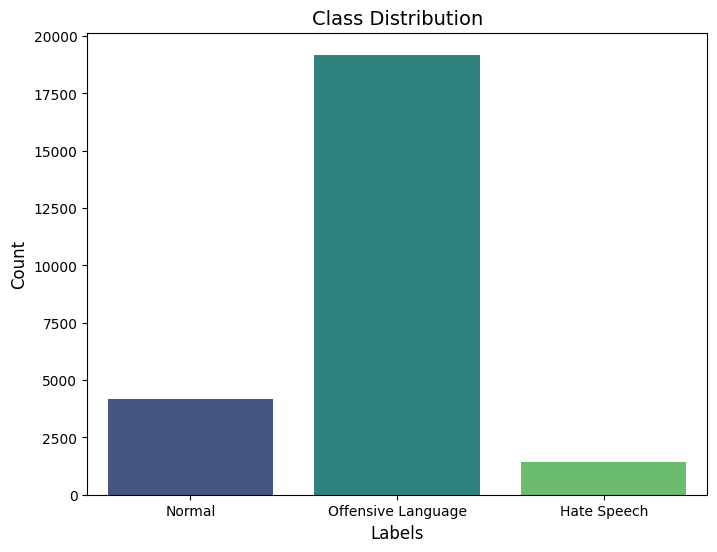

In [ ]:
!pip install matplotlib
!pip install seaborn
!pip install wordcloud


import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, classification_report

# 1. Visualizing Class Distribution
def plot_class_distribution(labels):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=labels, palette="viridis")
    plt.title("Class Distribution", fontsize=14)
    plt.xlabel("Labels", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.show()

plot_class_distribution(y)

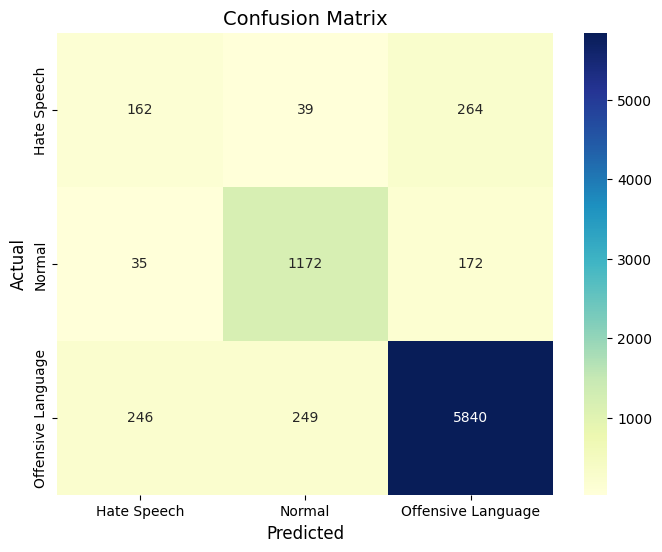

In [ ]:
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix", fontsize=14)
    plt.xlabel("Predicted", fontsize=12)
    plt.ylabel("Actual", fontsize=12)
    plt.show()

# Get predictions before calling the function
y_pred = clf.predict(X_test)

# Ensure labels are sorted and unique
class_labels = sorted(set(y))

# Now call the function with y_pred defined
plot_confusion_matrix(y_test, y_pred, class_labels)

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                    precision    recall  f1-score   support

       Hate Speech       0.37      0.35      0.36       465
            Normal       0.80      0.85      0.83      1379
Offensive Language       0.93      0.92      0.93      6335

          accuracy                           0.88      8179
         macro avg       0.70      0.71      0.70      8179
      weighted avg       0.88      0.88      0.88      8179

